<h2>Etape 1 :  Chargement et Prévisualisation des Données</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
data = pd.read_csv("weather_data_1000.csv")

# Aff les 5 premières lignes
print(data.head())

# Nombre de lignes et colonnes
print(f"Shape du DataFrame : {data.shape}")

# Types de données de chaque colonne
print("\nTypes de données :")
print(data.dtypes)


                  Date  Temperature  Precipitation  Humidity   Latitude  \
0  2023-01-02 08:00:00          9.7              0      40.5  31.051307   
1  2023-01-02 14:00:00          9.2             10      63.1 -10.336078   
2  2023-01-02 23:00:00          8.4             15      33.9  52.667066   
3  2023-01-04 02:00:00         10.9              0      57.1 -21.988942   
4  2023-01-04 05:00:00         10.7              0      50.3   7.253376   

    Longitude  Temperature_F  Is_Hot  
0  118.643699          49.46       0  
1  111.846085          48.56       0  
2   52.461016          47.12       0  
3  -41.021663          51.62       0  
4 -147.686580          51.26       0  
Shape du DataFrame : (1000, 8)

Types de données :
Date              object
Temperature      float64
Precipitation      int64
Humidity         float64
Latitude         float64
Longitude        float64
Temperature_F    float64
Is_Hot             int64
dtype: object


<h2>Etape 2 : Résumé statistique des données</h2>

In [3]:
# Statistiques
print(data.describe())

# Min et max des températures en °C
temp_min = data['Temperature'].min()
temp_max = data['Temperature'].max()
print(f"Température minimale : {temp_min} °C")
print(f"Température maximale : {temp_max} °C")

       Temperature  Precipitation     Humidity     Latitude    Longitude  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean      9.896200       1.840000    50.682700    -2.700336    -0.852300   
std      11.240476       4.368465    15.806842    51.069420   103.561562   
min     -12.300000       0.000000    30.000000   -89.994471  -179.918266   
25%      -0.200000       0.000000    37.000000   -47.278395   -89.179462   
50%       9.200000       0.000000    49.300000    -3.121833    -6.150004   
75%      20.500000       0.000000    63.100000    40.446042    90.473408   
max      32.500000      20.000000    97.300000    89.920387   179.565457   

       Temperature_F       Is_Hot  
count    1000.000000  1000.000000  
mean       49.813160     0.088000  
std        20.232856     0.283437  
min         9.860000     0.000000  
25%        31.640000     0.000000  
50%        48.560000     0.000000  
75%        68.900000     0.000000  
max        90.500000     1.

In [ ]:
# la temperature minimal est de -12.3°C et la temperature maximal est de 32.5°C

<h2>Etape 3 : Nettoyage des données</h2>

In [4]:
# Compte les valeurs manquantes par colonne
print(data.isnull().sum())

# Calcule la moyene de la colonne 'Temperature'
temp_mean = data['Temperature'].mean()

# Rempli les valeurs manquates
data['Temperature'] = data['Temperature'].fillna(temp_mean)

print(data.isnull().sum())

Date             0
Temperature      0
Precipitation    0
Humidity         0
Latitude         0
Longitude        0
Temperature_F    0
Is_Hot           0
dtype: int64
Date             0
Temperature      0
Precipitation    0
Humidity         0
Latitude         0
Longitude        0
Temperature_F    0
Is_Hot           0
dtype: int64


<h2>Etape 4 : Création de colonnes dérivées</h2>

In [5]:
# Conversion de Celsius en Fahenheit
data['Temp_Fahrenheit'] = data['Temperature'] * 9/5 + 32

print(data[['Temperature', 'Temp_Fahrenheit']].head())

   Temperature  Temp_Fahrenheit
0          9.7            49.46
1          9.2            48.56
2          8.4            47.12
3         10.9            51.62
4         10.7            51.26


<h2>Etape 5 : Filtrage des données</h2>

In [6]:
# Filtre les jours chauds
hot_days = data[data['Temperature'] > 30]

# Affiche les premières lignes filtrées
print(hot_days.head())

                    Date  Temperature  Precipitation  Humidity   Latitude  \
130  2023-02-24 18:00:00         30.3              0      67.1 -33.861702   
161  2023-03-09 01:00:00         31.2              0      61.2 -68.720648   
191  2023-03-19 07:00:00         31.0              0      70.1   8.405223   
203  2023-03-22 14:00:00         31.3             10      84.0  86.079720   
218  2023-03-29 04:00:00         30.6              5      72.7  49.543929   

      Longitude  Temperature_F  Is_Hot  Temp_Fahrenheit  
130  -64.492365          86.54       1            86.54  
161  -68.510984          88.16       1            88.16  
191 -177.486386          87.80       1            87.80  
203 -108.326369          88.34       1            88.34  
218  -56.127018          87.08       1            87.08  


<h2>Etape 6 :  Visualisation des données avec 
Matplotlib</h2>

In [ ]:
# Défini la taille du graphique
plt.figure(figsize=(10,6))

# Crée l'histogramme
plt.hist(data['Temperature'], bins=30, color='orange', edgecolor='black')

# Ajoute les titres et les étiquettes
plt.title('Distribution des Températures')
plt.xlabel('Température (°C)')
plt.ylabel('Fréquence')

# Affiche le graphique
plt.show()

<h2>Etape 7 : Exploration des relations avec Seaborn</h2>

In [ ]:
# Défini la taille du graphique
plt.figure(figsize=(10,6))

# Crée le scatter plot
sns.scatterplot(x='Temperature', y='Precipitation', data=data, hue='Is_Hot', palette='coolwarm')

# Ajout les titres et les étiquettes
plt.title('Relation entre Température et Précipitations')
plt.xlabel('Température (°C)')
plt.ylabel('Précipitation (mm)')

# Affiche la légende
plt.legend(title='Is Hot')

# Affiche le graphique
plt.show()

<h2>Etape 8 : Détection des tendances temporelles</h2>

In [ ]:
# Converti la colonn 'Date' en datetime
data['Date'] = pd.to_datetime(data['Date'])

# Défini la taille du graphique
plt.figure(figsize=(14,7))

# Trace la température au fl du temps
plt.plot(data['Date'], data['Temperature'], color='orange', alpha=0.6)

# Ajouter les titres et les étiquettes
plt.title('Évolution des Températures au Fil du Temps')
plt.xlabel('Date')
plt.ylabel('Température (°C)')

# Améliore la lisibilité des dates
plt.xticks(rotation=45)

# Affiche le graphique
plt.show()

<h2>Etape 9 : Résumé des corrélations</h2>

                     Date  Temperature  Precipitation  Humidity  Latitude  \
Date             1.000000    -0.751111      -0.036732 -0.656624  0.001721   
Temperature     -0.751111     1.000000      -0.022669  0.804875 -0.022239   
Precipitation   -0.036732    -0.022669       1.000000 -0.025241 -0.000178   
Humidity        -0.656624     0.804875      -0.025241  1.000000  0.000651   
Latitude         0.001721    -0.022239      -0.000178  0.000651  1.000000   
Longitude        0.017895    -0.049254       0.025373 -0.050477 -0.056020   
Temperature_F   -0.751111     1.000000      -0.022669  0.804875 -0.022239   
Is_Hot          -0.288212     0.483425      -0.058143  0.343321 -0.019749   
Temp_Fahrenheit -0.751111     1.000000      -0.022669  0.804875 -0.022239   

                 Longitude  Temperature_F    Is_Hot  Temp_Fahrenheit  
Date              0.017895      -0.751111 -0.288212        -0.751111  
Temperature      -0.049254       1.000000  0.483425         1.000000  
Precipitation   

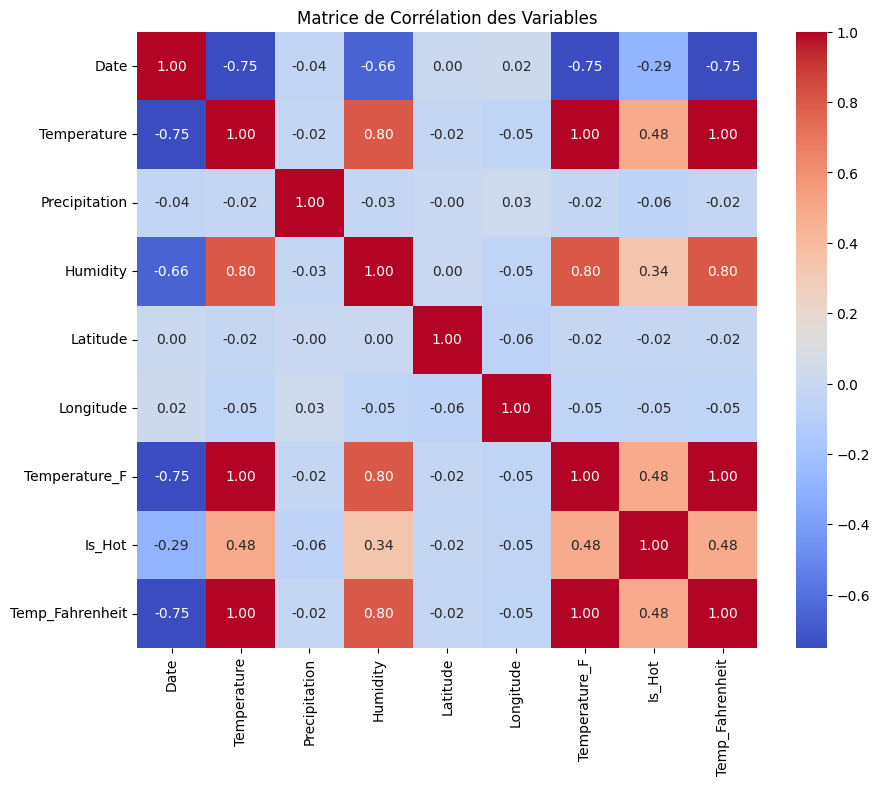

In [10]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()
print(corr_matrix)

# Définir la taille du graphique
plt.figure(figsize=(10,8))

# Créer la heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Ajoute le titre
plt.title('Matrice de Corrélation des Variables')

# Affiche le graphique
plt.show()

<h2>Etape 10 : Exportation des données transformées</h2>

In [11]:
# Exporter le DataFrame transformé
data.to_csv("weather_data_transformed.csv", index=False)

print("Les données transformées ont été enregistrées dans 'weather_data_transformed.csv'.")

Les données transformées ont été enregistrées dans 'weather_data_transformed.csv'.
